### Questions
* Understanding relationship between population and resampling
    * How is this used in the real world?
* If you resample on hypothesis testing does it effect error or confidence?
* Bootstrap sampling

### Objectives
YWBAT 
* use resampling methods in hypothesis testing

### Outline

In [28]:
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt

In [7]:
# pop1 - measuring the amount of sleep attained by students in flatiron
pop1 = np.random.exponential(scale=6.5, size=2000) #mu = 6.5 and std = 0.75 (hrs)

# pop2 - measuringthe amount of sleep attained by people not in flatiron
pop2 = np.random.exponential(scale=8, size=100000)

In [10]:
def make_hist(arr):
    plt.figure(figsize=(8, 5))
    plt.grid()
    plt.hist(arr, alpha=0.5, bins=20)
    plt.show()

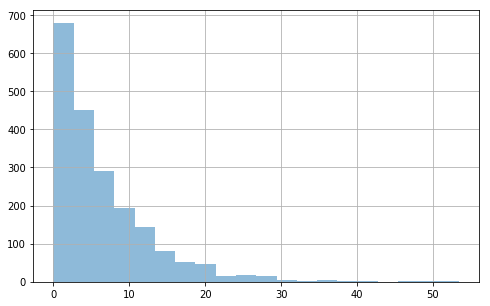

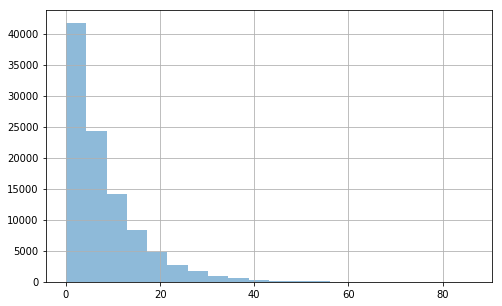

In [11]:
make_hist(pop1)
make_hist(pop2)

In [8]:
# how can I calculate the mean of my first population?
pop1.mean()

6.486270636538711

### are there problems using the mean this way?
* the straight-mean is susceptible to outliers
* using mean of population instead of sample
* the straight-mean is not a great method of measuring the mean of the population

In [25]:
# let's measure the mean by taking 50 samples
mu1s = []
mu2s = []

for iteration in range(50):
    # let's use bootstrap sampling
    samp1 = np.random.choice(pop1, replace=True, size=2000)
    mu1s.append(samp1.mean())
    
    samp2 = np.random.choice(pop2, replace=True, size=2000)
    mu2s.append(samp2.mean())

In [26]:
np.mean(mu1s), np.mean(mu2s)

(6.491007386871768, 7.9622255504936925)

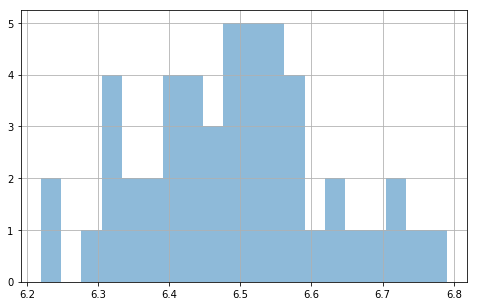

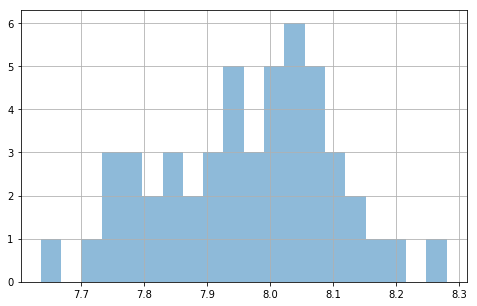

In [27]:
make_hist(mu1s)
make_hist(mu2s)

In [29]:
# bootstrap sample and run ttests
# let's compare the means of pop1 and pop2

### H_0: $\mu_{\text{pop1}} = \mu_{\text{pop2}}$
### H_A: $\mu_{\text{pop1}} \neq \mu_{\text{pop2}}$

In [30]:
# What kind of ttest do we need?
# 2 sample ttest, because we are comparing 2 samples


# How many tails? 2 tails, because it's equal vs neq.  
# 1 tail is used for example: h0: mu1 > m2 and ha: mu1 <= mu2

# What assumptions have to be validated
# normally distributed and independent -> student ttest if variances are equal else welch's

In [32]:
# this is wrong! because pop1 and pop2 are not normal

scs.ttest_ind(pop1, pop2, equal_var=False)
# pvalue is 0 which means we can reject the null

Ttest_indResult(statistic=-10.222273181032122, pvalue=5.603495046899576e-24)

## Let's use normal distributions
* because by the clt our sample statistics are normally distributed

In [43]:
samp1 = [np.mean(np.random.choice(pop1, size=2000)) for i in range(100)]
samp2 = [np.mean(np.random.choice(pop2, size=10000)) for i in range(100)]

In [44]:
scs.ttest_ind(samp1, samp2, equal_var=False)

Ttest_indResult(statistic=-92.86797957358587, pvalue=8.45554567122975e-133)

### What did you learn?
* I learned i can’t forget about central limit theorem….its everywhere
* I learned about how bootstrapping is done, and about a few of these tests that can be done regarding normality.
* Clt is king
* I  learned:
    * The uses for one and two sample tests
    * Taking the mean of a population is not all that useful
- how to deal with non-normal distributions when comparing means/parameters
- ubiquity of CLT (to steal from nick)
- that straight mean is not a great method of measuing pop mean
* I learned we need to apply the Welch test when deveations are not similar deviations
* I learned about the difference between one/two tail tests and the importance of taking sub-samples to identify the (real) mean of the population

In [49]:
# 1 sample example for pop1 
mu_test = 7

scs.ttest_1samp(samp1, 6.5)

Ttest_1sampResult(statistic=-0.5604720663446013, pvalue=0.5764236806316643)